In [14]:
import sys
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser
from PIL import Image

In [15]:
#Steganographie image dans une image

In [16]:
imgbase=''
imgcache=''

fcbase = FileChooser()
fcbase.title='<b> Choisissez votre image de base </b>'
fcbase.filter_pattern = ['*.jpg', '*.png']
display(fcbase)

fccache = FileChooser()
fccache.title='<b> Choisissez votre image à cacher </b>'
fccache.filter_pattern = ['*.jpg', '*.png']
display(fccache)

FileChooser(path='C:\Users\Paul Gosse\Desktop\Projet annuel', filename='', title='HTML(value='<b> Choisissez v…

FileChooser(path='C:\Users\Paul Gosse\Desktop\Projet annuel', filename='', title='HTML(value='<b> Choisissez v…

In [25]:
if fcbase.selected!=None or fccache.selected!= None:
    imgbase=Image.open(fcbase.selected)#remplacer le nom de l'image par sys.argv[1] pour l'éxecution en terminal
    imgcache=Image.open(fccache.selected)#remplacer le nom de l'image par sys.argv[2] pour l'éxecution en terminal
    if imgbase.size<imgcache.size:
        print('Vous devez choisir une image de base plus grande')
        fcbase.reset()
        fccache.reset()

In [18]:
def tuple2bin(rgb) :
    r,g,b=rgb
    return (str(bin(r)[2:].zfill(8)),str(bin(g)[2:].zfill(8)),str(bin(b)[2:].zfill(8)))

In [19]:
def bin2tuple(rgb):
    r,g,b=rgb
    return (int(r,2), int (g,2), int(b,2))

In [20]:
nbbit=5
def fusionrgb(rgb1, rgb2):
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rgb = (r1[:nbbit] + r2[:8-nbbit], g1[:nbbit] + g2[:8-nbbit], b1[:nbbit] + b2[:8-nbbit])
    return rgb

In [21]:
def convertrgb(img):
    if img.mode != 'RGB':
        fond=Image.new('RGB', img.size, (255, 255, 255))
        fond.paste(img, mask=img.split()[3])
        fond.save('newimg.jpg', 'JPEG', quality=80)
        return(fond)
    else:
        print(img.filename +' déjà rgb')
        return(img)

In [22]:
def fusion(imgbase, imgcache):
    imgbase=convertrgb(imgbase)
    imgcache=convertrgb(imgcache)
    imgbasergb=imgbase.load()
    if imgcache.mode!= 'RGB':
        imgcachergb=Image.open("newimg.jpg").load()
    else:
        imgcachergb=imgcache.load()
    newimg=Image.new(imgbase.mode, imgbase.size)
    newimgrgb=newimg.load()
    longbase=imgbase.size[0]
    largbase=imgbase.size[1]
    for i in range(longbase):
        for j in range(largbase):
            imgbasebin=tuple2bin(imgbasergb[i, j])
            if i < imgcache.size[0] and j < imgcache.size[1]:
                imgcachebin=tuple2bin(imgcachergb[i, j])
            rgb=fusionrgb(imgbasebin, imgcachebin)
            newimgrgb[i, j]=bin2tuple(rgb)
    return newimg

In [23]:
def defusion(imgfinal):
    imgfinalopen=Image.open(imgfinal)
    imgfinalrgb=imgfinalopen.load()
    longfinal=imgfinalopen.size[0]
    largfinal=imgfinalopen.size[1]
    imgcachee=Image.new(imgfinalopen.mode, imgfinalopen.size)
    imgcacheergb=imgcachee.load()
    for i in range(longfinal):
        for j in range(largfinal):
            r,g,b=tuple2bin(imgfinalrgb[i, j])
            rgb=(r[nbbit:]+nbbit*'0', g[nbbit:]+nbbit*'0', b[nbbit:]+nbbit*'0')
            imgcacheergb[i, j]=bin2tuple(rgb)
    return imgcachee

C:\Users\Paul Gosse\Desktop\Projet annuel\lena.png déjà rgb


Text(0.5, 1.0, 'Image cachée')

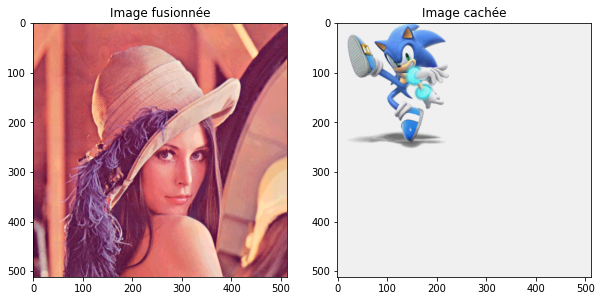

In [26]:
imgfinal=fusion(imgbase, imgcache)
imgfinal.save("fusion.png")
imgcachee=defusion("fusion.png")
imgcachee.save("defusion.png")

plt.figure(figsize=(10,20))
ax=plt.subplot(121)
ax.imshow(imgfinal)
ax.set_title('Image fusionnée')
ax2=plt.subplot(122)
ax2.imshow(imgcachee)
ax2.set_title('Image cachée')